# Simple Linear Regression

Regression Models are used for predicting a continuous, real value when the independent variable is time. Forecasting future values. Vary from Linear Regression to SVR to Random Forests Regression.

Intuition: y = mx+b. Y is the dependent variable,  x is the independent variable, m is the coefficient, and b is the intercept. "Best-fit" line of your data.

In any project it is useful to define your variables before you start. There should also be a correlation between the variables, otherwise the regression is meaningless.

## Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing the dataset

In [66]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values   #choosing all the columns and all the rows except the last one
y = dataset.iloc[:, -1].values    #choosing all the columns and only the last row

# Checking for Assumptions

## Correlation Matrix
Data needs to be correlated firstly

In [76]:
dataset.corr()['Salary'].sort_values(ascending = False)

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

Excluding the Salary, which is expected to be 1, the x and y variables are heavily correlated, which is important to know before using Linear Regression

## Linearity

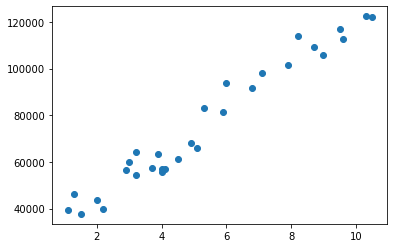

In [77]:
plt.scatter(dataset["YearsExperience"], dataset["Salary"])

The relationship between the data looks linear, so it is safe to proceed with Linear Regression

# Creating and Training the Model

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#training is used to "fit" the model

LinearRegression()

## Predicting the Test set results

In [22]:
y_pred = regressor.predict(X_test)
#testing is used as data for the model to predict

# Metrics
Metrics are performed on the testing data. That is what we are interested in.

In [23]:
#Get the r2_score, which is a measure of how well the regression model fits the observed data.
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

97.49154407708353 %


# Visualising the Training set results
We are going to plot the training data as a scatter plot and then on top of that visualize the best-fit line of the regressor. We are plotting the X value and the regressor's prediction for that X value as a line.

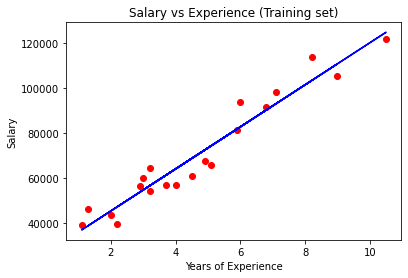

In [24]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

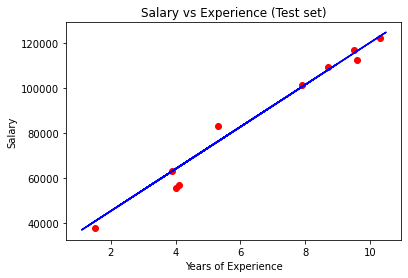

In [25]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Get the model formula
We now want to know what is the formula of the line we just visualized.

In [26]:
b = regressor.intercept_
m = regressor.coef_[0]
print("Model is y = {}x + {}".format(m,b))

Model is y = 9345.94244312237x + 26816.19224403119


## Some fun: predicting individual values if we know the years of experience

In [58]:
def make_prediction():
    exp = int(input("How many years of experience do you have?"))
    salary = m * exp + b
    print("With " + str(exp) + " years of experience, your expected salary is: $" + str(salary))

In [59]:
make_prediction()


With 4 years of experience, your expected salary is: $64199.96201652067
